#ASSIGNMENT 3 (Date of submission: 14/06/2023)
#A) Plot bibliographic graph(or its subgraph) for a hetrogenous network and visualize it

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# Load the ScDir_Finale_Data.csv dataset using pandas
df = pd.read_csv('/content/ScDir_Finale_Data.csv')
df

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Document Title,Authors,Author Affiliations,Universities,Publication Year,Citations,DOI,Publisher
0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
1,1,1,1,Blockchain adoption and channel selection stra...,"['Bengang Gong', 'Huaimiao Zhang', 'Yiling Gao...",China,['Anhui Polytechnic University No8 Beijing Zho...,2022,0.0,https://www.sciencedirect.com/science/article/...,Science direct
2,2,2,2,A systematic literature review on blockchain g...,"['Yue Liu', 'Qinghua Lu', 'Liming Zhu', 'Hye-Y...",Australia,['University of New South Wales'],2023,0.0,https://www.sciencedirect.com/science/article/...,Science direct
3,3,3,3,Accounting and auditing with blockchain techno...,"['Hongdan Han', 'Radha K. Shiwakoti', 'Robin J...",United Kingdom,['Brunel University London'],2023,0.0,https://www.sciencedirect.com/science/article/...,Science direct
4,4,4,4,A survey of blockchain consensus safety and se...,"['Qihao Bao', 'Bixin Li', 'Tianyuan Hu', 'Xuey...",China,['Southeast University'],2023,0.0,https://www.sciencedirect.com/science/article/...,Science direct
...,...,...,...,...,...,...,...,...,...,...,...
1118,1118,1118,1118,Problems of Using Redactable Blockchain Techno...,"['Yakob Mesengiser', 'Natalia Miloslavskaya']",Russia,['The National Research Nuclear University MEP...,0,0.0,https://www.sciencedirect.com/science/article/...,Science direct
1119,1119,1119,1119,KCB-BC-SSE: A Keyword Complete Binary Tree Sea...,"['Xiru Liu', 'Guijuan Wang', 'Biwei Yan', 'Jig...",PR,"['Qufu Normal University', 'Qilu University of...",0,0.0,https://www.sciencedirect.com/science/article/...,Science direct
1120,1120,1120,1120,KCB-BC-SSE: A Keyword Complete Binary Tree Sea...,"['Xiru Liu', 'Guijuan Wang', 'Biwei Yan', 'Jig...",China,"['Qufu Normal University', 'Qilu University of...",0,0.0,https://www.sciencedirect.com/science/article/...,Science direct
1121,1121,1121,1121,Innovative blockchain-based farming marketplac...,"['Guilain Leduc', 'Sylvain Kubler', 'Jean-Phil...",France,[],2021,0.0,https://www.sciencedirect.com/science/article/...,Science direct


In [3]:
# Remove rows with NaN or null values
df.dropna(inplace=True)

In [4]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Remove rows with null values
df.dropna(inplace=True)

# Reset the index
df.reset_index(drop=True, inplace=True)

# Save the cleaned dataset to a new file
df.to_csv('Sc_Direct_cleaned.csv', index=False)

In [5]:
df.keys()

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'Document Title',
       'Authors', 'Author Affiliations', 'Universities', 'Publication Year',
       'Citations', 'DOI', 'Publisher'],
      dtype='object')

In [6]:
# Extract relevant columns for bibliographic connections
df_citations = df[['Author Affiliations', 'Citations']]

unique_nodes = set(df['Author Affiliations']).union(set(df['Citations']))
print(unique_nodes)

# Create an empty directed graph
graph = nx.DiGraph()

{0.0, 'Ireland', 1.0, 2.0, 4.0, 'Kazakhstan', 3.0, 'Bangladesh', 'Kuwait', 6.0, 7.0, 8.0, 'France', 'SC', 14.0, 19.0, 25.0, 'MO', 30.0, 'UAE', 34.0, 'TN', 'Republic of China', 39.0, 42.0, 'Belgium', 'Lebanon', 'Saudi Arabia', 'Brazil', 'MA', 'to', 'Egypt', 'Chile', 'Argentina', 'Australia', 'MK', 'Iran', 'Poland', 'New Zealand', 'MN', 'Qatar', 'Estonia', 'United States', 'Philippines', 'La', 'South Africa', 'PA', 'la', 'Spain', 'Ghana', 123.0, 'El Salvador', 'No', 'Ss', 'AT', 'Jersey', 'De', 'UK', 'Singapore', 'Switzerland', 156.0, 'Algeria', 'USA', 'Turkey', 'IL', 'Lithuania', 'Netherlands', 'MS', 'United Arab Emirates', 'United States of America', 'Dominican Republic', 'Sweden', 'Mauritius', 'Sierra Leone', 'GG', 'Serbia', 'KY', 'Am', 'Czech Republic', 'Luxembourg', 'Hong Kong', 'Thailand', 'United Kingdom', 'PG', 'Japan', 'MD', 'do', 'Indonesia', 'Slovakia', 'NC', 'Norway', 'AL', 'in', 'ST', 'Slovenia', 'CO', 'de', 'IT', 'at', 'Malaysia', 'sn', 'South Korea', 'JAPAN', 'Macau', 'Finl

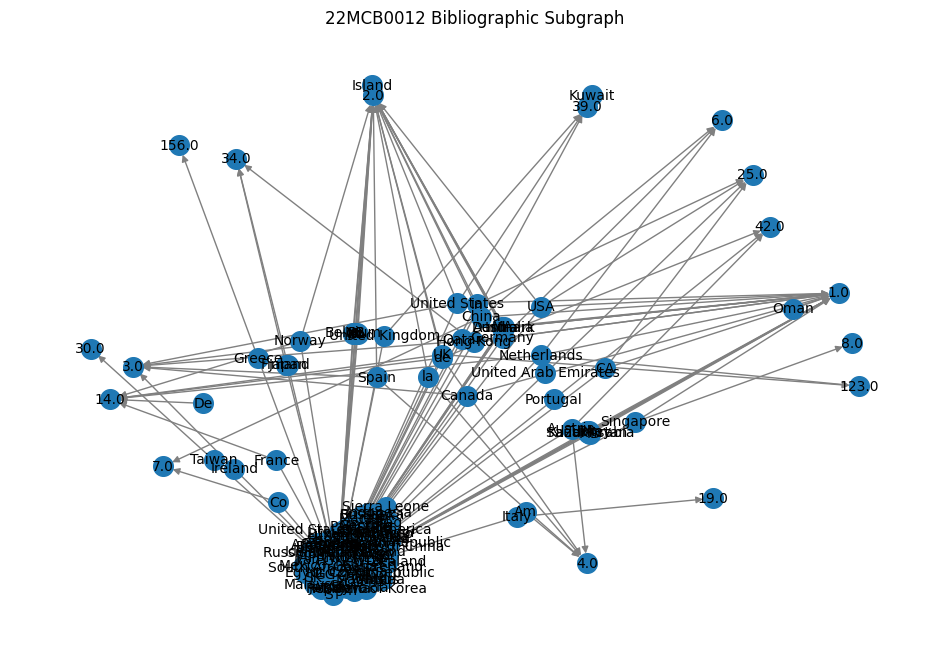

In [7]:
# Add nodes to the graph
for _, row in df_citations.iterrows():
    paper_title = row['Author Affiliations']
    citation = row['Citations']

    # Add paper title as a node
    graph.add_node(paper_title)

    # Add citation as a node
    graph.add_node(citation)

    # Add edge between paper title and citation
    graph.add_edge(paper_title, citation)

# Visualize the graph
pos = nx.spring_layout(graph)
plt.figure(figsize=(12, 8))
nx.draw_networkx(graph, pos, with_labels=True, node_size=200, font_size=10, edge_color='gray')
plt.title('22MCB0012 Bibliographic Subgraph')
plt.axis('off')
plt.show()

B) Node and edge classification
   Number of topics or papers (similarity in biblographic graph like topic modeling(just an eg do not do)
   Use any classifier or clustering(preferable)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


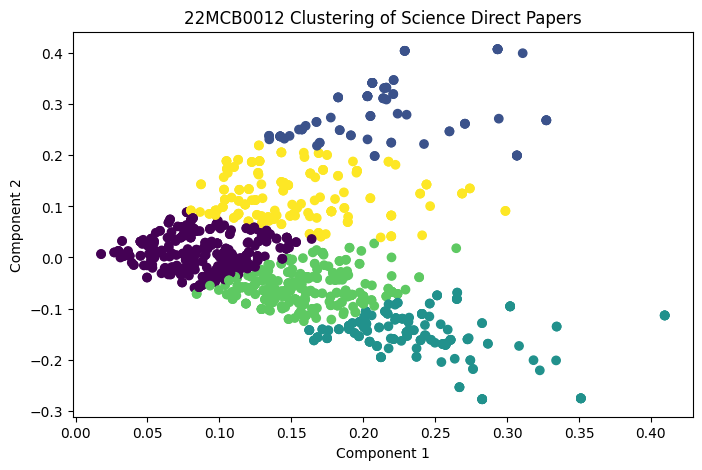

In [10]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
# Extract node features (number of topics or papers)
node_features = np.array([len(graph[node]) for node in graph.nodes()]).reshape(-1, 1)

# Remove rows with NaN or null values
df.dropna(inplace=True)

# Select relevant features for clustering (e.g., abstracts)
data = df['Document Title'].tolist()

# Vectorize the abstracts using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data)

# Reduce dimensionality using Truncated SVD
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X)

# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X_svd)

# Plot the clusters
plt.figure(figsize=(8, 5))
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=labels, cmap='viridis')
plt.title('22MCB0012 Clustering of Science Direct Papers')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

<ipython-input-9-a758e4ce54f3>:18: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


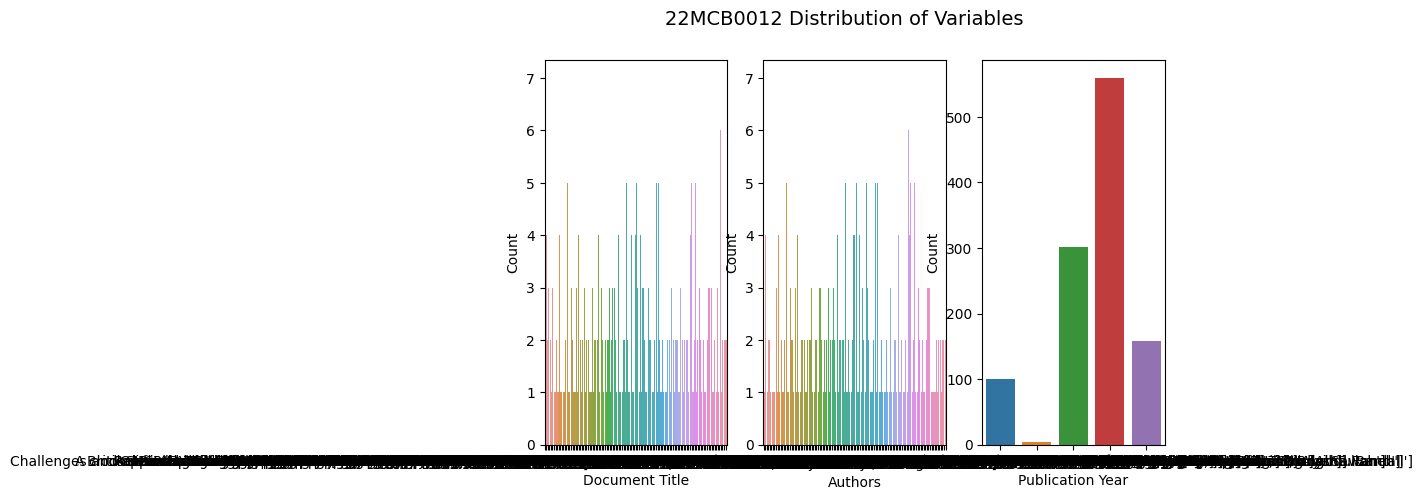

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns you want to evaluate health on
columns_to_evaluate = ['Document Title', 'Authors', 'Publication Year']

fig, axes = plt.subplots(1, len(columns_to_evaluate), figsize=(8, 5))
axes = axes.flatten()

for i, col in enumerate(columns_to_evaluate):
    g = sns.countplot(x=col, data=df, ax=axes[i])
    if len(df[col].unique()) > 5:
        g.set_xticks(range(0, len(df[col].unique()), 5))
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.suptitle('22MCB0012 Distribution of Variables', fontsize=14)
plt.tight_layout()
plt.show()